# Project Checklist Outline

1. Proposed Project Change
    - justification for project change
    - purusit of original project proposal individually over the summer

2. Project Code (Github url)
    - overarching Github repositiory
    - specific final project directory within overarching repository 

3. Project Data Sources
    - origin, including urls and documentation
    - formats
    - how I accessed it
        - caching used
    - summary of data
        - number of records available
        - number of records retrieved
        - description of records (fields and data types)
    - evidence of caching
        - snapshot of cache file OR
        - implementation in code

4. Database Schema
    - ERD
    - justification for use of database in sheets/excel
    - include .sql file of database of current existing records
    - screenshots of some of the data in the database
        - old data vs new data

5. Interaction and Presentation Plan
    - code contained in a notebook that is used to update the database on a somewhat regular basis (when website is updated or once a month)
    - data studio report linked to sheet containing data





# 1. Proposed Final Project Change



## A. Background:

- After developing my first proposal for my final project, I completed a project for another course (SI564) and realized an urgent need for the organization I'm collaborating with (The Chicago Council of Science and Technology, C2ST) as a part of the Community Corps program.
    - I designed a database for the organization's static data from their events, YouTube videos, and Facebook posts. 
    - Cleaning and manipulating the data to make it work within the database's structure was extremely challenging, and would require the organization to manually download reports from these websites, clean the data, and input it to the database.

- I felt there had to be an easier way to maintain a database for this organization, and started looking into web scraping the events directly from their website.
    - In doing this, I uncovered ways their event data directly to some of their external data sources (analytics from Google Data Studio, their Eventbrite event registration pages, and potentially their YouTube and Facebook pages.

## B. Change Proposal: 

- Ultimately, I'd like to use this as the foundation for my final project, rather than the project involving creating Pokemon hybrids.
    - Realistically, I don't think I would be successful if I attempt to create both of these (A databse for C2ST and a Pokemon hybrid interactive program).
    - I feel creating a new and improved database for the organization is more meaningful, and I would like to pursue this with 100% of my effort, rather than attempting less than 100% of my effort in both projects.


### Challeng Score 8:

- Crawl and Scrape 53 pages of event listings and their corresponding individual event pages to collect event specific data
    - [Event Listings URL](https://www.c2st.org/events/)
    - [Example Event Specific Page URL](https://www.c2st.org/event/science-and-sandwiches-featuring-darion-crawford/)


## C. Additional Pursuits:

- I would like to pursue my original proposal indivudally over the summer. If willing, I'd like to share updates on my progress and/or my final results with the teaching team via Slack. 
    - I think creating an interactive Pokemon Hybrid platform would be fun, and I'd like to apply additional, more advanced statistical processing to the data
    - I feel I'd be happier with my results of the Pokemon proposal if I had more time to explore and include additional functionality to it.

# 2. Project Code URL

- [Overarching github repository](https://github.com/s-ryanlee/ChicagoCouncilSciTech) containing the relavent files associated with my Community Corps team's work with the organization

- Relavent data files and manipulation notebooks for my SI564 project's code will be contained in the repository's ["database/SI564" directory](https://github.com/s-ryanlee/ChicagoCouncilSciTech/tree/main/database).
    - this project manipulated the organization's current data files into a relational database
    - inconsistent data collection across Facebook and YouTube pages made me realize the need for better data collection, which led me to starting to web scrape the organization's [Event page](c2st.org/events).

- My code files for this project will be contained in the overarching repository's ["database/SI507" directory](https://github.com/s-ryanlee/ChicagoCouncilSciTech/tree/main/database)

# 3. Data Sources

## A. Data Origin: c2st.org/events

In [1]:
BASE_URL = 'https://www.c2st.org/events/'

## B. Data Format: HTML

### Example: 

#### Event Listing

<div class="event-listing">
        <div class="row">
         <div class="col-sm-12 col-md-12 col-lg-12">
          <h3 class="content-title">
           <a href="https://www.c2st.org/event/science-and-sandwiches-featuring-darion-crawford/">
            Science and Sandwiches featuring Darion Crawford
           </a>
          </h3>
         </div>
        </div>
        <div class="row event-row">
         <div class="col-sm-4">
          <!-- <a href="" class="content-image" style="background-image: url();"></a> -->
          <a class="event-image" href="https://www.c2st.org/event/science-and-sandwiches-featuring-darion-crawford/">
           <img src="https://www.c2st.org/wp-content/uploads/2021/04/Science-and-Sandwiches-5.7.2021-Graphic.png"/>
          </a>
         </div>
         <div class="col-xs-12 col-sm-8 col-md-4">
          <p class="content-subheading date-time">
           <span class="event-date">
            May 7, 2021
           </span>
           <br/>
           <span class="event-time">
            12:15 pm
    
         – 12:45 pm
           </span>
           <br/>
          </p>
          <p class="content-subheading">
           <span class="event-location">
            Zoom
           </span>
           <br/>
           <p class="content-subheading">
            <a class="btn btn-primary" href="https://www.eventbrite.com/e/science-and-sandwiches-featuring-darion-crawford-tickets-151061814955" target="_blank">
             Register Now
            </a>
           </p>
           <p class="content-subheading program-series-link">
            Program Series:
            <br/>
            <a href="https://www.c2st.org/program-series/">
             Life Science
            </a>
            <a href="https://www.c2st.org/program-series/">
             Science and Society
            </a>
           </p>
          </p>
         </div>
         <div class="col-xs-12 col-sm-8 col-sm-offset-4 col-md-4 col-md-offset-0 content-excerpt">
          <p>
           <span style="font-weight: 400;">
            Join C2ST and
           </span>
           <b>
            Darion Crawford
           </b>
           <span style="font-weight: 400;">
            for our monthly Science and Sandwiches Program! On the first Friday of every month, we will be sitting down with an expert during the lunch hour to chat about life, about science, careers, a day on the job, and whatever else you’re interested in learning about them–within reason, anyways.
           </span>
           <a class="more-link" href="https://www.c2st.org/event/science-and-sandwiches-featuring-darion-crawford/#more-14744">
            Read more…
           </a>
          </p>
         </div>
        </div>

## C. Data Access: 

### 1. Current Progress Data Aquisition

- I used the requests module to access the data, with plans to implement caching functions similar to the implemenation in Project 2. 

In [8]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [5]:
class Event:
    '''A C2ST Program (Event) Listing
    Instance Attributes
    -------------------
    full_title: string
        the title of the program (e.g. 'Science and Sandwiches featuring Darion Crawford')
    event_url: string
        the url associated with the event specific page
    date: string
        the date of the program (e.g. 'May 7, 2021')
    start_time: string
        the start time of the program (e.g. 12:15 pm)
    end_time: string
        the end time of the program (e.g. 12:45 pm)
    location: string
        the event location (e.g. 'Zoom')
        could also be a physical address if it is an in-person event
    eventbrite_url: string
        the url to the corresponding eventbrite registration page
    series: string
        the series category the program belongs to
    description: string
        the program description from the event listing page (much shorter than full description)
    '''
    def __init__(self, full_title, event_url, date, start_time, end_time, location, eventbrite_url, series, description):
        self.full_title = full_title
        self.event_url = event_url
        self.date = date
        self.start_time = start_time
        self.end_time = end_time
        self.location = location
        self.eventbrite_url = eventbrite_url
        self.series = series
        self.description = description 

    def info(self):
        return f"{self.full_title} on {self.date} from {self.start_time} to {self.end_time}"

#### a. Single Event Scrape Test

**Event Page html**

get event page full html and write to txt file

In [9]:
c2st_event_html_pg1 = requests.get(BASE_URL).text
event_soup = BeautifulSoup(c2st_event_html_pg1, 'html.parser')
gdrive_html_in_path = '/content/drive/Shareddrives/C2ST_CommunityCorpsW21/deliverables/notebooks/c2st_data_files/html_files/'
f = open(gdrive_html_in_path + "c2st_event_pg1.txt", "w")
f.write(event_soup.prettify())
f.close()

**List Body**

extract list from full page html to get the parent container

In [10]:
listing_body = event_soup.find(name='div', class_='site-content')
#print(listing_body)
pages_events = listing_body.find(name='main', class_='site-main main-index')
#print(pages_events)
event_listing = pages_events.find(name='div', class_='event-listing')
#print(event_listing)

**Total Pages**

get total number of pages existing
get next page link

In [11]:
all_pages = pages_events.find_all(name='a', class_='page-numbers')
# all the pages listed on the current page header and footer (i.e. 2, 3, 53)
# print(all_pages)
last_page = all_pages[2]
#print(last_page)
num_pages = last_page.text
print(num_pages)

53


**Event Listing**

get specific event listing info

In [12]:
event_title = event_listing.find(name='h3', class_='content-title')
#print(event_title)
title = event_title.text
event_url = event_title.find(name='a')['href']
event_dict = {title: event_url}
print(title, event_url)

Science and Sandwiches featuring Darion Crawford https://www.c2st.org/event/science-and-sandwiches-featuring-darion-crawford/


In [13]:
all_details = event_listing.find_all(name='p', class_='content-subheading')
#print(all_details)
date_time_detail = all_details[0]
location_series_detail = all_details[1]
register_detail = all_details[2]
series_detail = all_details[3]
#print(series_detail)

date = date_time_detail.find(name='span', class_='event-date').text
start_time = date_time_detail.find(name='span', class_='event-time').text.split()[0]
end_time = date_time_detail.find(name='span', class_='event-time').text.split()[-2]
location = location_series_detail.find(name='span', class_='event-location').text
eventbrite_url = register_detail.find(name='a')['href']
program_series = [x.text for x in series_detail.find_all(name='a')]

print(date, start_time, end_time, location, eventbrite_url, program_series)

May 7, 2021 12:15 12:45 Zoom https://www.eventbrite.com/e/science-and-sandwiches-featuring-darion-crawford-tickets-151061814955 ['Life Science', 'Science and Society']


**Event Specific Page Scrape**

In [14]:
description_details = event_listing.find(name='div', class_='col-xs-12 col-sm-8 col-sm-offset-4 col-md-4 col-md-offset-0 content-excerpt')
# print(description_details)
event_description_html = requests.get(event_dict[title]).text
description_soup = BeautifulSoup(event_description_html)
description_parent = description_soup.find(name='div', class_='site-content')
#print(description_parent)
description = description_parent.find(name='div', class_='entry-content')
#print(description)
description_text = [x.text for x in description.find_all(name='p')[:3]][0]
print(description_text)

Join C2ST and Darion Crawford for our monthly Science and Sandwiches Program! On the first Friday of every month, we will be sitting down with an expert during the lunch hour to chat about life, about science, careers, a day on the job, and whatever else you’re interested in learning about them–within reason, anyways.


**Instantiate Event**

In [15]:
ss_darion_crawford = Event(title, event_url, date, start_time, end_time, location, eventbrite_url, program_series, description_text)
print(ss_darion_crawford.info())
ss_darion_crawford_data = {
    'title': ss_darion_crawford.full_title,
    'event_url': ss_darion_crawford.event_url,
    'start_time': ss_darion_crawford.start_time,
    'end_time': ss_darion_crawford.end_time,
    'location': ss_darion_crawford.location,
    'eventbrite_url': ss_darion_crawford.eventbrite_url,
    'series1': ss_darion_crawford.series[0],
    'series2': ss_darion_crawford.series[1],
    'description': ss_darion_crawford.description
}

Science and Sandwiches featuring Darion Crawford on May 7, 2021 from 12:15 to 12:45


**Write data to file**

In [16]:
gdrive_out_path = '/content/drive/Shareddrives/C2ST_CommunityCorpsW21/deliverables/notebooks/c2st_data_files/'

In [17]:
ss_darion_crawford_df = pd.DataFrame.from_dict(ss_darion_crawford_data, orient='index').T
ss_darion_crawford_df

,title,event_url,start_time,end_time,location,eventbrite_url,series1,series2,description
0,Science and Sandwiches featuring Darion Crawford,https://www.c2st.org/event/science-and-sandwic...,12:15,12:45,Zoom,https://www.eventbrite.com/e/science-and-sandw...,Life Science,Science and Society,Join C2ST and Darion Crawford for our monthly ...


In [18]:
ss_darion_crawford_df.to_csv(gdrive_out_path + 'single_event.csv')

#### b. Many Events Scrape Test

**Instantiate Events on page 1**

In [19]:
all_event_listings = event_soup.find_all(name='div', class_='event-listing')
page1_event_objs = []
for listing in all_event_listings:
    event_title = listing.find(name='h3', class_='content-title')
    #print(event_title)
    title = event_title.text
    event_url = event_title.find(name='a')['href']
    event_dict = {title: event_url}
    print(title, event_url)

    all_details = listing.find_all(name='p', class_='content-subheading')
    #print(all_details)
    date_time_detail = all_details[0]
    location_series_detail = all_details[1]
    register_detail = all_details[2]
    series_detail = all_details[3]
    #print(series_detail)

    date = date_time_detail.find(name='span', class_='event-date').text
    start_time = date_time_detail.find(name='span', class_='event-time').text.split()[0]
    end_time = date_time_detail.find(name='span', class_='event-time').text.split()[-2]
    location = location_series_detail.find(name='span', class_='event-location').text
    eventbrite_url = register_detail.find(name='a')['href']
    program_series = [x.text for x in series_detail.find_all(name='a')]
    print(date, start_time, end_time, location, eventbrite_url, program_series)

    #description_details = listing.find(name='div', class_='col-xs-12 col-sm-8 col-sm-offset-4 col-md-4 col-md-offset-0 content-excerpt')
    # print(description_details)

    event_description_html = requests.get(event_dict[title]).text
    description_soup = BeautifulSoup(event_description_html)
    description_parent = description_soup.find(name='div', class_='site-content')
    #print(description_parent)
    description = description_parent.find(name='div', class_='entry-content')
    #print(description)
    description_text = [x.text for x in description.find_all(name='p')]
    print(description_text)

    event_instance = Event(title, event_url, date, start_time, end_time, location, eventbrite_url, program_series, description_text)
    page1_event_objs.append(event_instance)

    print(event_instance.info())
    print('\n------------------------------------------------\n')



Science and Sandwiches featuring Darion Crawford https://www.c2st.org/event/science-and-sandwiches-featuring-darion-crawford/
May 7, 2021 12:15 12:45 Zoom https://www.eventbrite.com/e/science-and-sandwiches-featuring-darion-crawford-tickets-151061814955 ['Life Science', 'Science and Society']
['Join C2ST and Darion Crawford for our monthly Science and Sandwiches Program! On the first Friday of every month, we will be sitting down with an expert during the lunch hour to chat about life, about science, careers, a day on the job, and whatever else you’re interested in learning about them–within reason, anyways.', 'Darion Crawford is an urban farmer and instructor with Urban Growers Collective, a nonprofit organization that manages 8 farms predominantly on Chicago’s south side. Darion has been farming since he was 16 years old, giving him plenty of time to grow his knowledge of urban agriculture. He has presented nationally on topics like hoop-house and aquaponics construction, and large-s

**Page 1 Events to Dict**

In [20]:
page1_data_dicts = []
for obj in page1_event_objs:
    data_dict = {
    'title': obj.full_title,
    'event_url': obj.event_url,
    'start_time': obj.start_time,
    'end_time': obj.end_time,
    'location': obj.location,
    'eventbrite_url': obj.eventbrite_url,
    'series': obj.series,
    #'series2': obj.series[1],
    'description': obj.description
    }
    page1_data_dicts.append(data_dict)
print(page1_data_dicts)

[{'title': 'Science and Sandwiches featuring Darion Crawford', 'event_url': 'https://www.c2st.org/event/science-and-sandwiches-featuring-darion-crawford/', 'start_time': '12:15', 'end_time': '12:45', 'location': 'Zoom', 'eventbrite_url': 'https://www.eventbrite.com/e/science-and-sandwiches-featuring-darion-crawford-tickets-151061814955', 'series': ['Life Science', 'Science and Society'], 'description': ['Join C2ST and Darion Crawford for our monthly Science and Sandwiches Program! On the first Friday of every month, we will be sitting down with an expert during the lunch hour to chat about life, about science, careers, a day on the job, and whatever else you’re interested in learning about them–within reason, anyways.', 'Darion Crawford is an urban farmer and instructor with Urban Growers Collective, a nonprofit organization that manages 8 farms predominantly on Chicago’s south side. Darion has been farming since he was 16 years old, giving him plenty of time to grow his knowledge of u

**Events Dict to Pandas DF and CSV**

In [21]:
page1_events_df = pd.DataFrame(page1_data_dicts)
page1_events_df

,title,event_url,start_time,end_time,location,eventbrite_url,series,description
0,Science and Sandwiches featuring Darion Crawford,https://www.c2st.org/event/science-and-sandwic...,12:15,12:45,Zoom,https://www.eventbrite.com/e/science-and-sandw...,"[Life Science, Science and Society]",[Join C2ST and Darion Crawford for our monthly...
1,Here to There: The History & Future of Chicago...,https://www.c2st.org/event/here-to-there-the-h...,5:00,6:00,Facebook Live and C2ST YouTube TV,https://www.eventbrite.com/e/here-to-there-the...,"[Climate, Energy, and Environment, Technology ...",[Chicago has a rich history of public transpor...
2,Working Together to Keep the Lakes Great,https://www.c2st.org/event/working-together-to...,5:00,6:00,Facebook Live and C2ST YouTube TV,https://www.eventbrite.com/e/working-together-...,"[Climate, Energy, and Environment, Science and...",[Here’s a trivia question: what contains 20% o...
3,A Window into Science 2021,https://www.c2st.org/event/a-window-into-scien...,4:00,4:00,Virtual,https://www.eventbrite.com/e/a-window-into-sci...,[],[You are cordially invited to “A Window Into S...
4,Nanoengineered Materials and Thermal Engineeri...,https://www.c2st.org/event/nanoengineered-mate...,3:30,4:45,Illinois Tech YouTube Channel,https://www.youtube.com/watch?v=yqGb5NfthIA,[Technology and Engineering],[This program is part of the IIT Distinguished...
5,Science and Sandwiches featuring Jeanette Bart...,https://www.c2st.org/event/science-and-sandwic...,12:15,12:45,Virtual,https://www.eventbrite.com/e/science-and-sandw...,"[Science and Society, Technology and Engineering]",[Join C2ST and Dr. Jeanette Bartley for our mo...


In [22]:
page1_events_df.to_csv(gdrive_out_path + 'page1_events.csv')

## D. Summary of Records

- Estimated Total Records
    - There are about 5 events per Event listing page
    - There are 53 pages of events
    - Estimated 265 records to be compiled
- Current Records:
    - Currently I've compiled 5 records and working on a function to crawl each of the event listing pages to collect the reamining ~260 records

## E. Evidence of Caching

Currently I have not implemented a caching function to run each time I collect records. I have saved some of the data I currently collected as a TXT and CSV file. 
- [The TXT file](https://drive.google.com/file/d/1Bto7XF4eu66bZIdpENTwJk3XB3NoVnj4/view?usp=sharing) contains the raw html code
- [The CSV file](https://drive.google.com/file/d/1rvEy2bRKWtRR8TGix59US4jrq-zhnWVV/view?usp=sharing) contains the relavent record information. 

I plan to write functions based on the caching used in Project 2. My code from Project 2 is included below.

In [ ]:
def load_cache():
    '''Tries to read and load cache file into a local dictionary.
    If unsuccessful, local dictionary remains empty.
    Parameters
    ----------
    None
    Returns
    -------
    chache: dictionary
        a dictionary containing the cache file
    '''
    try:
        cache_file = open(CACHE_FILE_NAME, 'r')
        cache_file_contents = cache_file.read()
        cache = json.loads(cache_file_contents)
        cache_file.close()
    except:
        cache = {}
    return cache


def save_cache(cache):
    '''Adds new information to the saved cache file.
    Parameters
    ----------
    cache : dictionary
        local cache dictionary
    Returns
    -------
    None
    '''
    cache_file = open(CACHE_FILE_NAME, 'w')
    contents_to_write = json.dumps(cache)
    cache_file.write(contents_to_write)
    cache_file.close()


def make_url_request_using_cache(url, cache, params=None):
    '''Makes a request to data saved in the local cache or directly from the webpage,
    depending on if url already exists within the cache.
    Parameters
    ----------
    url: string
        url for the requested webpage
    cache: dictionary
        local cache dictionary
    Returns
    -------
    cache[url]: string
        html code saved in the cache associated with the given url
    '''
    if (url in cache.keys()): # the url is our unique key
        print("Using cache")
        return cache[url]
    else:
        if params is not None:
            print("Fetching")
            response = requests.get(url, params=params, headers=headers)
            cache[response.url] = response.text
            save_cache(cache)
            return cache[response.url]
        else:
            print("Fetching")
            response = requests.get(url, headers=headers)
            cache[response.url] = response.text
            save_cache(cache)
            return cache[response.url]


# 4. Database

## A. Entity Relationship Diagram

- Static Data

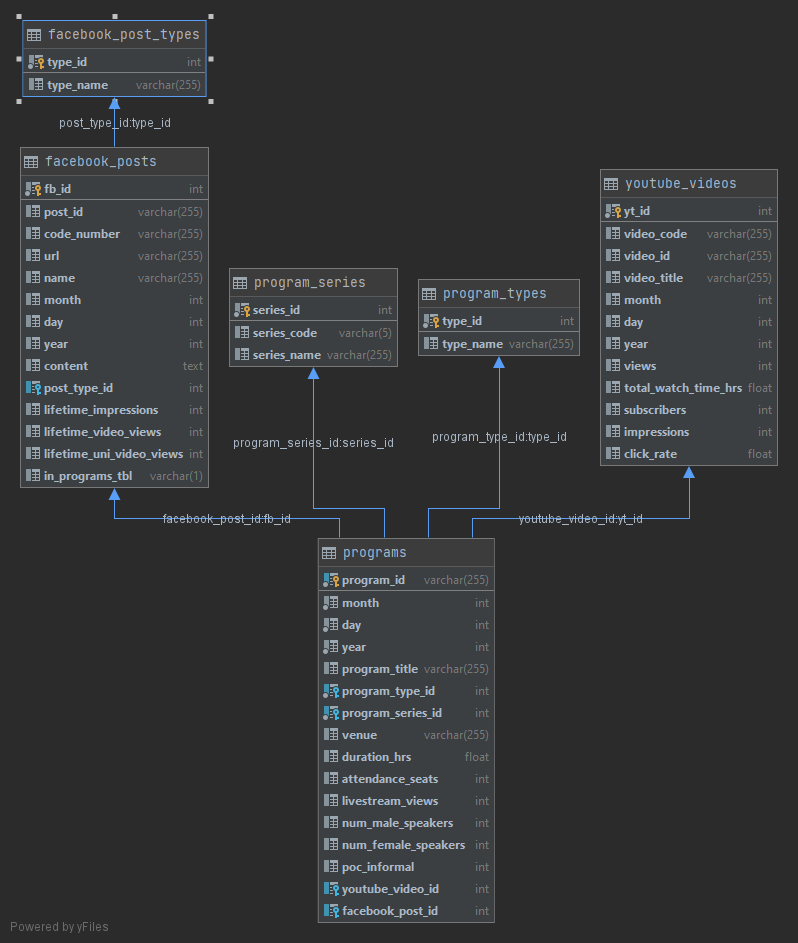

- Sample ERD

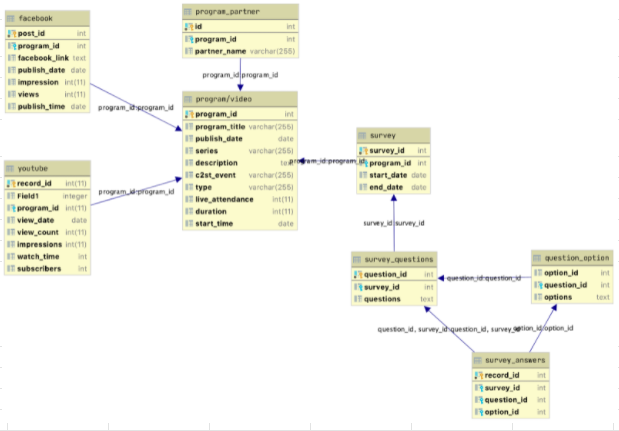

- Web Scraped Data

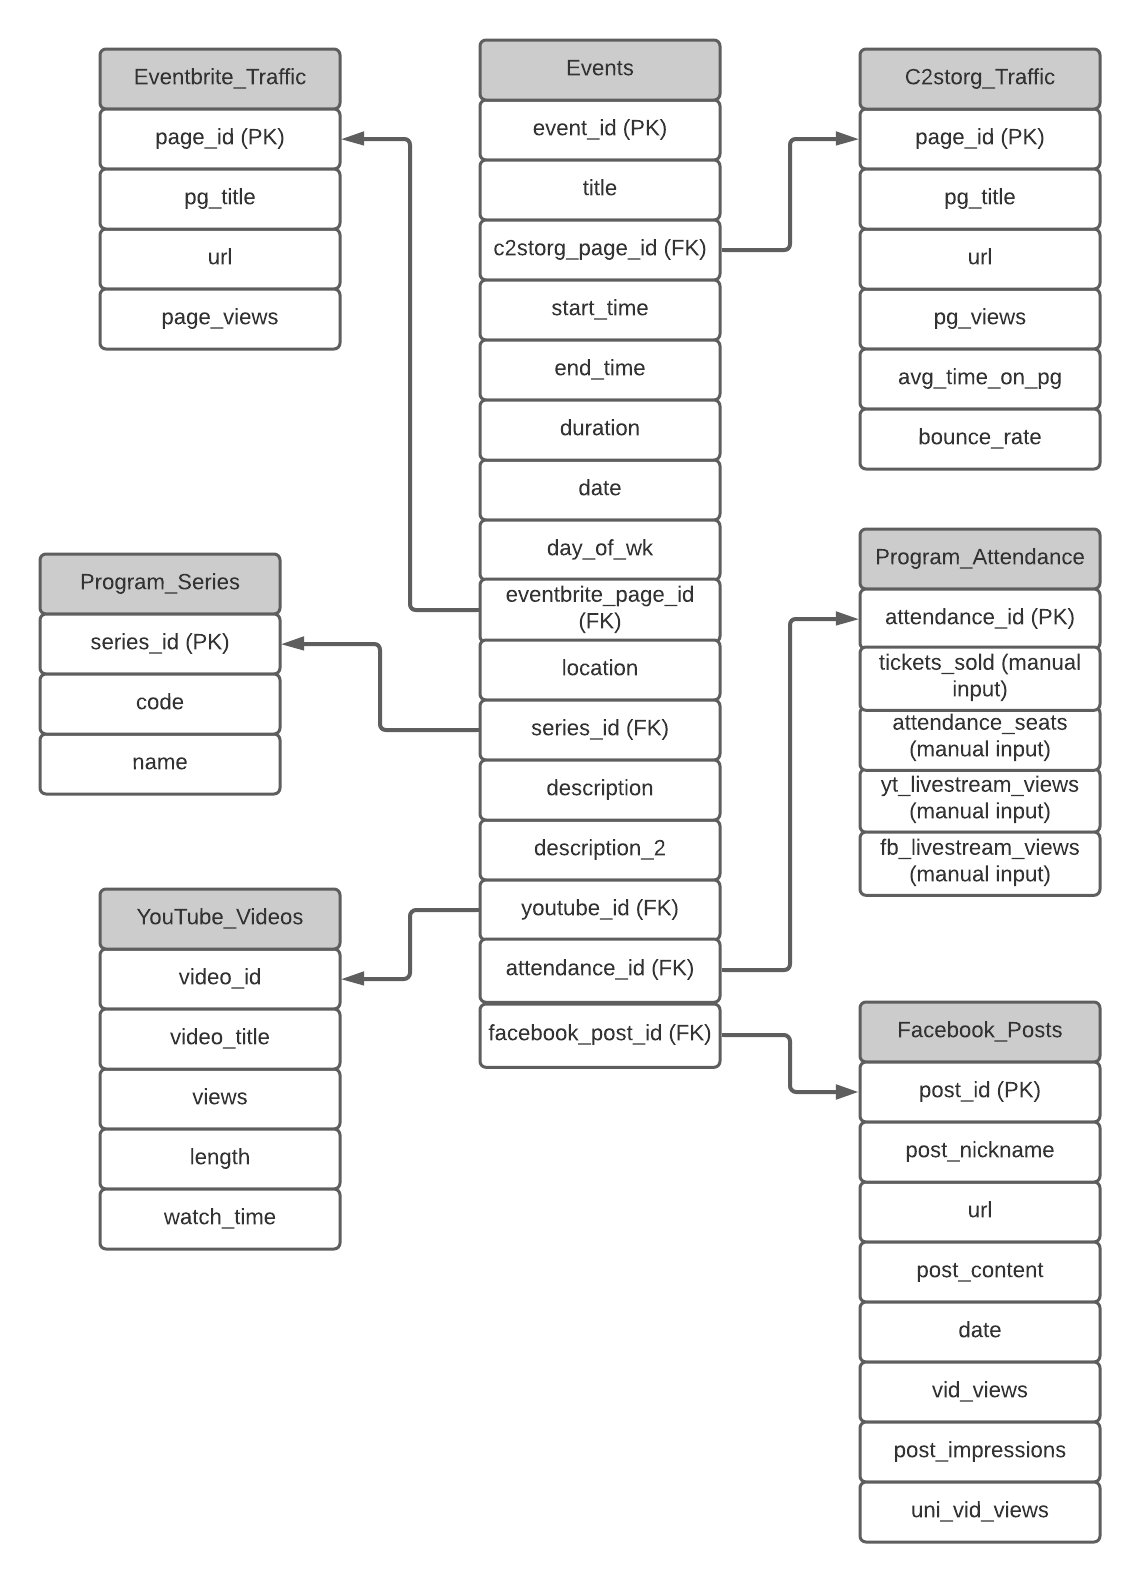

## B. Data in Tables

Static Database Creation Queries

`Create schema C2ST_programs;`

`create table facebook_posts (
fb_id int auto_increment, post_id varchar(255) null, code_number varchar(255) null, url varchar(255) null,
name varchar(255) null, month int null,
day int null,
year int null,
content text null,
post_type_id int null, lifetime_impressions int null, lifetime_video_views int null, lifetime_uni_video_views int null, in_programs_tbl varchar(1) null, constraint facebook_posts_pk
primary key (fb_id) );`

`alter table facebook_posts
add constraint facebook_posts_type_id_fk
foreign key (post_type_id) references facebook_post_types (type_id)
on update cascade on delete cascade;`

`create table facebook_post_types (
type_id int auto_increment, type_name varchar(255) null, constraint facebook_post_types_pk
primary key (type_id) );`

`INSERT INTO C2ST_programs.facebook_post_types (type_name) VALUES ('SharedVideo')`
  
`C2ST_programs> INSERT INTO C2ST_programs.facebook_post_types (type_name) VALUES ('Video')`

`create table youtube_videos (
yt_id int auto_increment, video_code varchar(255) null, video_id varchar(255) null, video_title varchar(255) null, month int null,
day int null,
year int null,
views int null, total_watch_time_hrs float null, subscribers int null, impressions int null,
click_rate float null, constraint youtube_videos_pk
primary key (yt_id) );`

`create table program_types (
type_id int auto_increment,
type_name varchar(255) not null );`

`create unique index program_types_type_id_uindex on program_types (type_id);
alter table program_types
add constraint program_types_pk
primary key (type_id);`

`create table program_series (
series_id int auto_increment, series_code varchar(5) null, series_name varchar(255) null, constraint program_series_pk
primary key (series_id) );`




The organization does not want any sql or sqlite files. They requested data be maintained in google sheets/excel files. We've discussed the limitations and have provided them with documentation on best practicesfor this.

Data will be output to a CSV or XLSX that can be opened in Google Sheets and can be connected to Google Data Studio

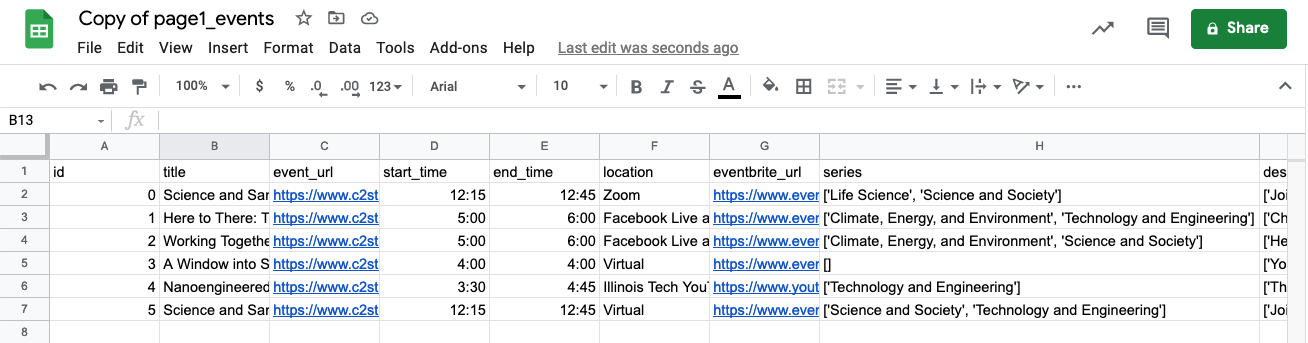

# 5. Interaction and Presentation Plans

## A. Interaction
- Interactive Google Colab Notebook

### 1. Justification

- Organization did not want any tool that required technical ability to use

- We have another notebook that implements user input to help them clean and reformat their survey data

- Using Google Colab prevents any technical inaccessibilty from running programs from the command line
    - we attempted to implement a flask program for the organization earlier in the semester, and could not find a way to host the web application publicly
    - the organization did not want to have to run anything from their local machines, which is why we opted for Google Colab - no local python environment needed to run.


## B. Visualizations

- Organization requested the 'database' contained in a google sheet/excel file that gets repopulated when the organization runs the program to update their event data.

- They requested visualizations to be maintained in a Google Data Studio report, as this is how they recieve analytic reporting for 3 other data sources (Web traffic across their main c2st.org page and web traffic across their event registration eventbrite page, and YouTube Video analytics)

- Plan to create 4 visualizations: 
    1. Bar plot of number of events in each series, further broken down by day of week
    2. Scatter plot of program day of week and attendance rates
    3. Bar plot of eventbrite registration rates for events in each program series
    4. Scatter plot of eventbrite registration traffic and event attendance rate


#### Data Studio Example Report from Static Data

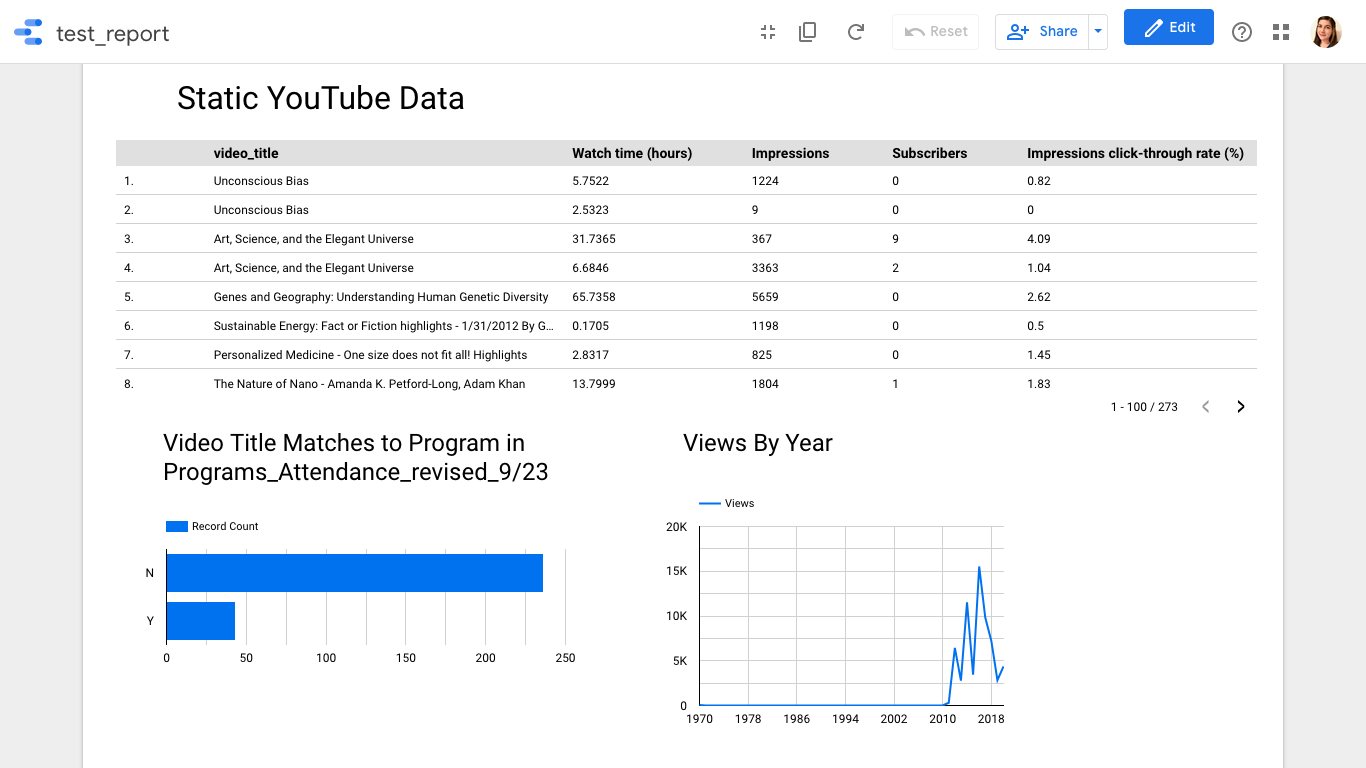
